## Sampling Corona Model

In [1]:
%matplotlib inline

from infection_models import sample_transmission

import pyro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
samples = []
for _ in range(10000):
    samples.append(sample_transmission())

samples = pd.DataFrame(samples, columns=['Protocol', 'Contacted People', 'Infection Rate', 'Infected People'])
samples['Protocol'] = samples['Protocol'].astype("category")

samples.head(10)

,Protocol,Contacted People,Infection Rate,Infected People
0,social_distancing,25.0,0.094190,2.0
1,normal_behavior,83.0,0.213768,17.0
2,social_distancing,23.0,0.249648,5.0
3,normal_behavior,102.0,0.161529,14.0
4,social_distancing,32.0,0.091204,5.0
5,social_distancing,23.0,0.076092,1.0
6,social_distancing,35.0,0.097260,5.0
7,social_distancing,20.0,0.021880,0.0
8,normal_behavior,100.0,0.184850,16.0
9,social_distancing,30.0,0.161999,4.0


In [7]:
cols = ['Contacted People', 'Infection Rate', 'Infected People']

normal_behavior = samples[samples['Protocol'] == 'normal_behavior']
normal_behavior = normal_behavior[cols]

social_distance = samples[samples['Protocol'] == 'social_distancing']
social_distance = social_distance[cols]

### Normal Behavior Plots

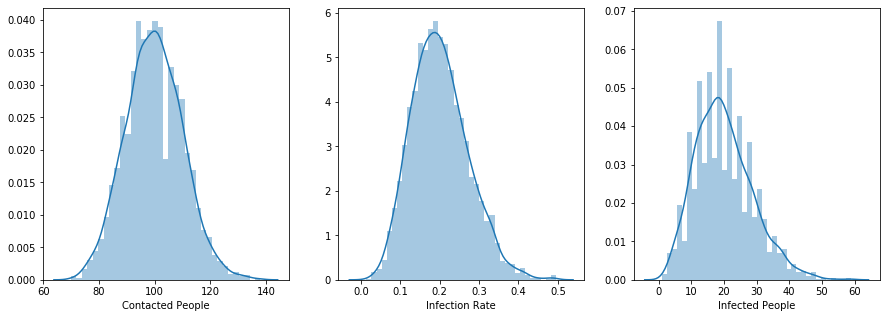

In [8]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.distplot(normal_behavior['Contacted People'], ax=axs[0])
sns.distplot(normal_behavior['Infection Rate'], ax=axs[1])
sns.distplot(normal_behavior['Infected People'], ax=axs[2])

### Social Distancing Plots

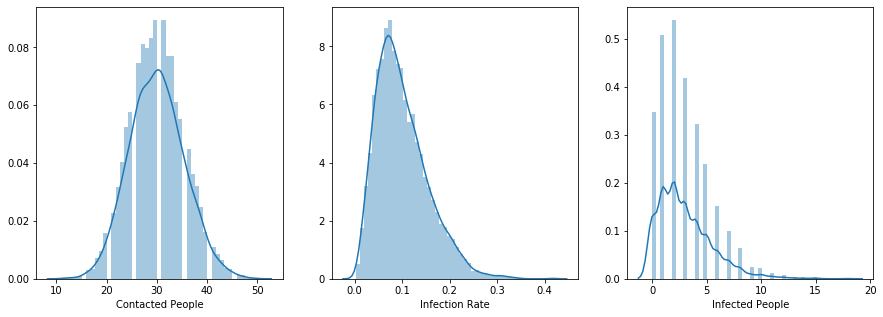

In [9]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.distplot(social_distance['Contacted People'], ax=axs[0])
sns.distplot(social_distance['Infection Rate'], ax=axs[1])
sns.distplot(social_distance['Infected People'], ax=axs[2])